In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
X.shape

(60000, 32, 32, 3)

**visualize**

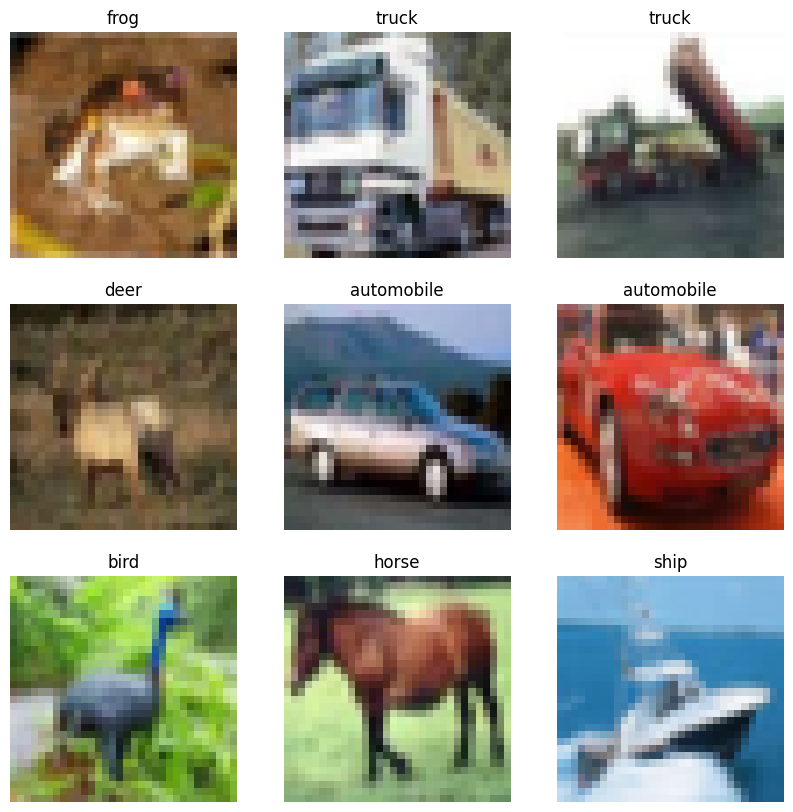

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i])
    plt.title(class_names[y[i][0]])
    plt.axis('off')
plt.show()

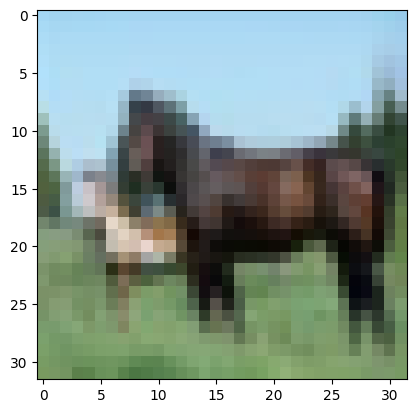

In [ ]:
plt.figure()
plt.imshow(X[12])


**Statistics**

In [ ]:
print("Mean pixel value:", np.mean(X))
print("Standard deviation of pixel values:", np.std(X))
print("Minimum pixel value:", np.min(X))
print("Maximum pixel value:", np.max(X))

Mean pixel value: 120.84449672851562
Standard deviation of pixel values: 64.13596441053241
Minimum pixel value: 0
Maximum pixel value: 255


In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (60000, 32, 32, 3)
Shape of y: (60000, 1)


**Channel-wise Statistics**

In [ ]:
means = np.mean(X, axis=(0, 1, 2)) / 255.0
stds = np.std(X, axis=(0, 1, 2)) / 255.0

print("Mean of channels:", means)
print("Std of channels:", stds)


Mean of channels: [0.49186878 0.48265391 0.44717728]
Std of channels: [0.24697121 0.24338894 0.26159259]


**Analyze Image Dimensions**


In [ ]:
print(f'Shape of a single image: {X[0].shape}')

unique_shapes = np.unique([img.shape for img in X], axis=0)
print(f'Unique image shapes in the dataset: {unique_shapes}')


Shape of a single image: (32, 32, 3)
Unique image shapes in the dataset: [[32 32  3]]


**color channel**

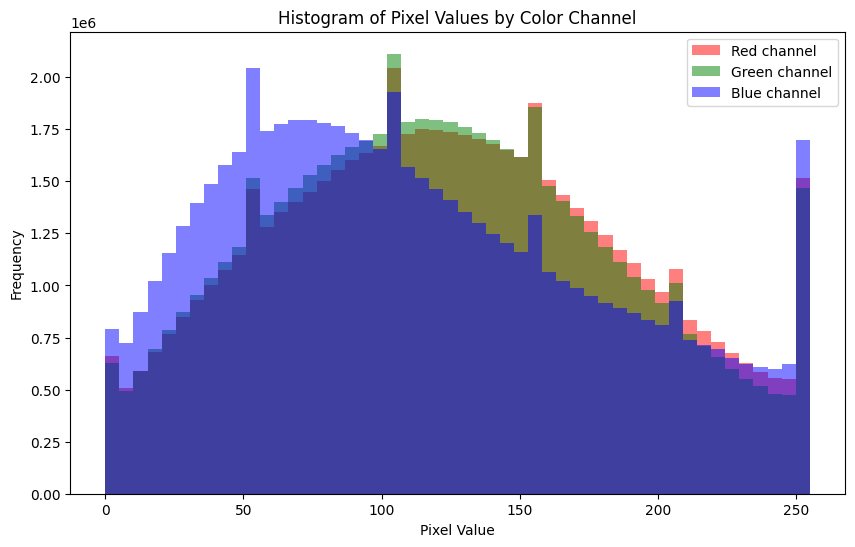

In [ ]:
color_channels = ['Red', 'Green', 'Blue']
plt.figure(figsize=(10, 6))

for i, color in enumerate(color_channels):
    plt.hist(X[:, :, :, i].flatten(), bins=50, color=color.lower(), alpha=0.5, label=f'{color} channel')

plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Values by Color Channel')
plt.legend()
plt.show()

In [ ]:
# Explanation: This part of the code is used to select the data to be plotted. X is a 4D NumPy array with the shape (num_images, height, width, num_channels), where num_channels is 3 for RGB images.
# [:, :, :, i]: This indexing selects all images, all rows, all columns, but only the i-th color channel. i is typically 0 for Red, 1 for Green, and 2 for Blue in RGB images.

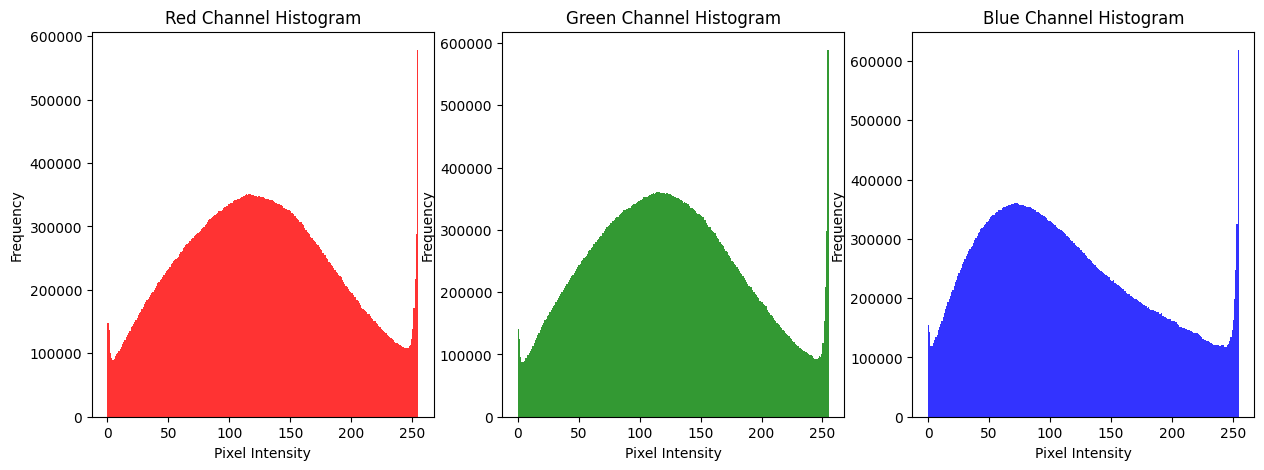

In [ ]:
channels = ['Red', 'Green', 'Blue']
colors = ['r', 'g', 'b']
plt.figure(figsize=(15, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    plt.subplot(1, 3, i+1)
    plt.hist(X[:, :, :, i].ravel(), bins=256, color=color, alpha=0.8)
    plt.title(f'{channel} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.show()

In [ ]:
y.shape

(60000, 1)

In [ ]:
class_counts = pd.Series(y.flatten()).value_counts()
class_counts

,count
6,6000
9,6000
4,6000
1,6000
2,6000
7,6000
8,6000
3,6000
5,6000
0,6000



**Distribution**

In [ ]:
# Example: If class_names = ['airplane', 'automobile', 'bird'], and class_counts.index = [0, 1, 2], then the index will be updated to ['airplane', 'automobile', 'bird'].

<ipython-input-18-7ab70696005e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


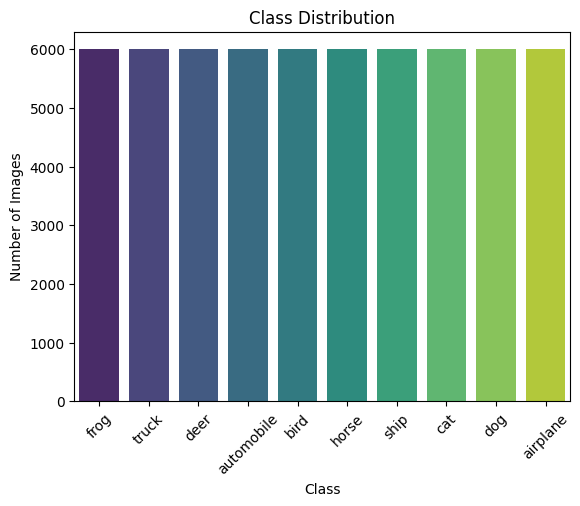

In [ ]:
class_counts = pd.Series(y.flatten()).value_counts()
class_counts.index = [class_names[i] for i in class_counts.index]
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()



**Corrupt image**

In [ ]:
X.shape

(60000, 32, 32, 3)

In [ ]:
nan_values = np.sum(np.isnan(X))
print(f'Number of NaN values in the dataset: {nan_values}')

Number of NaN values in the dataset: 0


In [ ]:
def check_for_corrupt_images(X):
    corrupted = 0
    for i, img in enumerate(X):
        if img.shape != (32, 32, 3):
            corrupted += 1
    print(f"Number of corrupted images: {corrupted}")

check_for_corrupt_images(X)


Number of corrupted images: 0


**edge detection**

In [ ]:
# Threshold1 (100):

# This is the lower threshold value.
# If a pixel gradient is below this value, it is considered as not an edge.
# This helps to suppress noise and minor variations in the image that are not significant edges.
# Threshold2 (200):

# This is the upper threshold value.
# If a pixel gradient is above this value, it is considered a strong edge.
# Strong edges are likely to be true edges in the image.

# Threshold1: Lower threshold to filter out non-edges and suppress noise.
# Threshold2: Upper threshold to detect strong edges.

In [ ]:
def detect_edges(images):
    edge_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 100, 200)
        edge_images.append(edges)
    return edge_images

edge_images = detect_edges(X[:25])

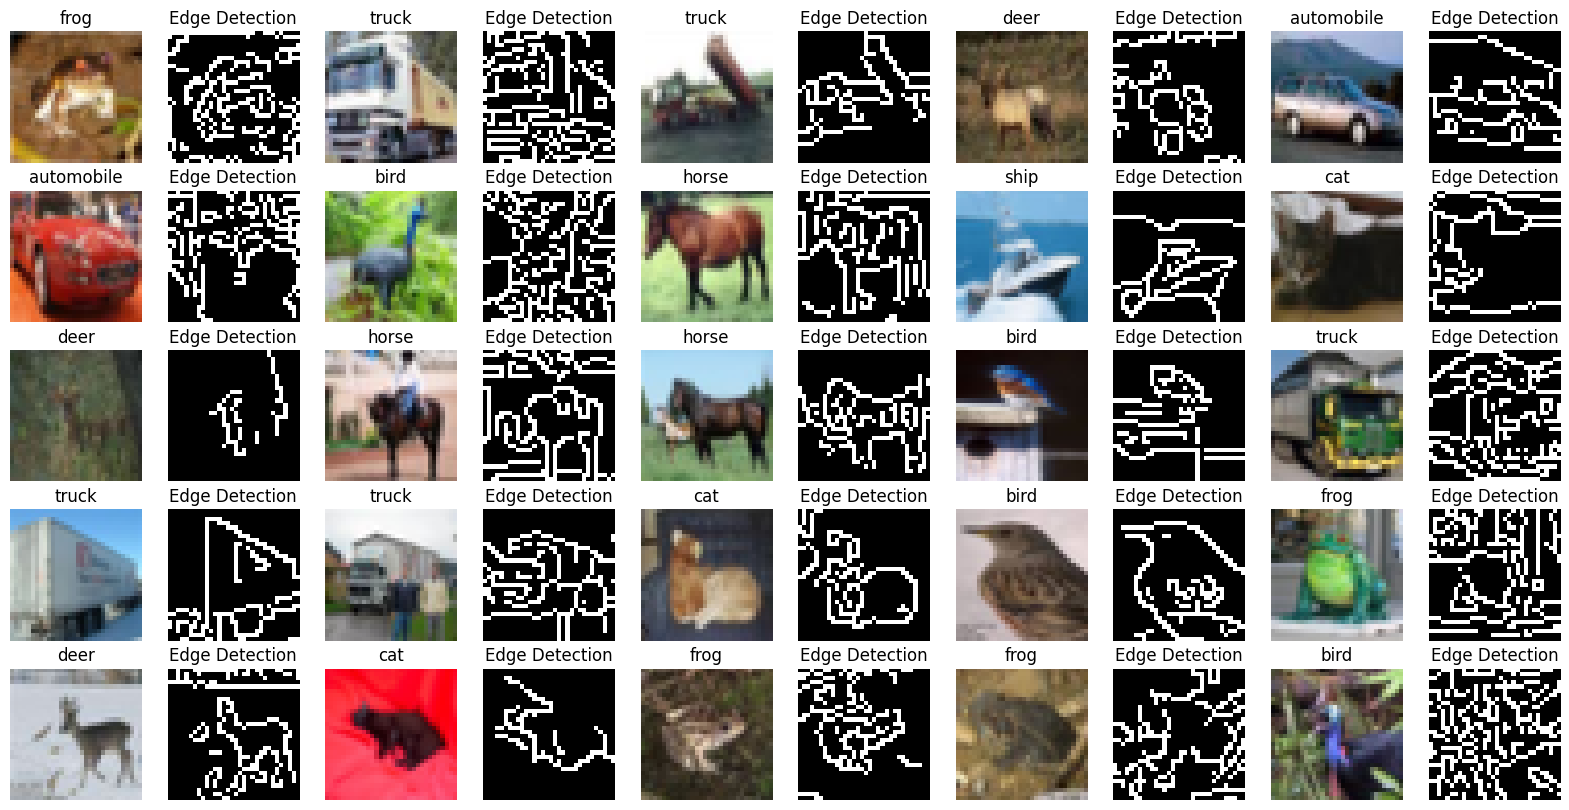

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(25):
    plt.subplot(5, 10, 2*i+1)
    plt.imshow(X[i])
    plt.title(class_names[y[i][0]])
    plt.axis('off')

    plt.subplot(5, 10, 2*i+2)
    plt.imshow(edge_images[i], cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')
plt.show()

**correlation**

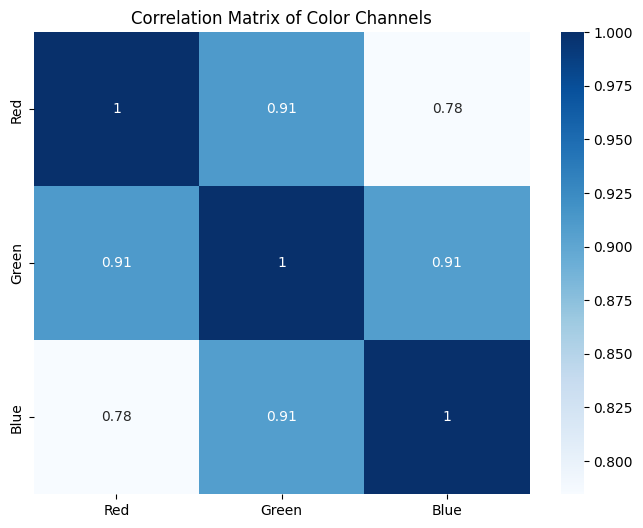

In [ ]:

color_channels = ['Red', 'Green', 'Blue']

red_channel = X[:, :, :, 0].flatten()
green_channel = X[:, :, :, 1].flatten()
blue_channel = X[:, :, :, 2].flatten()

pixels = np.vstack((red_channel, green_channel, blue_channel))

correlation_matrix = np.corrcoef(pixels)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues',
            xticklabels=color_channels, yticklabels=color_channels)
plt.title('Correlation Matrix of Color Channels')
plt.show()


In [ ]:
red_channel


array([ 59,  43,  50, ..., 116,  68,  27], dtype=uint8)

In [ ]:
correlation_matrix


array([[1.        , 0.91148632, 0.78448075],
       [0.91148632, 1.        , 0.90747874],
       [0.78448075, 0.90747874, 1.        ]])

(array([ 443824.,  403741.,  316069.,  299199.,  303257.,  310315.,
         323860.,  331688.,  345516.,  355972.,  368432.,  380555.,
         395712.,  412028.,  426099.,  439916.,  454467.,  466144.,
         478862.,  495562.,  503927.,  517803.,  531175.,  540247.,
         554290.,  565362.,  579694.,  588588.,  601458.,  611583.,
         623442.,  635854.,  645722.,  654294.,  665957.,  674997.,
         684494.,  694021.,  705377.,  715148.,  723490.,  735720.,
         744554.,  754947.,  760821.,  769116.,  778410.,  786177.,
         795342.,  802911.,  810097.,  818383.,  829935.,  834610.,
         840357.,  846521.,  852983.,  857837.,  865621.,  871697.,
         878768.,  885507.,  895645.,  898188.,  905625.,  911470.,
         915253.,  922454.,  927007.,  932540.,  934827.,  942870.,
         947772.,  953620.,  954583.,  956444.,  960921.,  965780.,
         969103.,  971269.,  976057.,  977911.,  982354.,  986706.,
         989728.,  991667.,  993435.,  997278., 

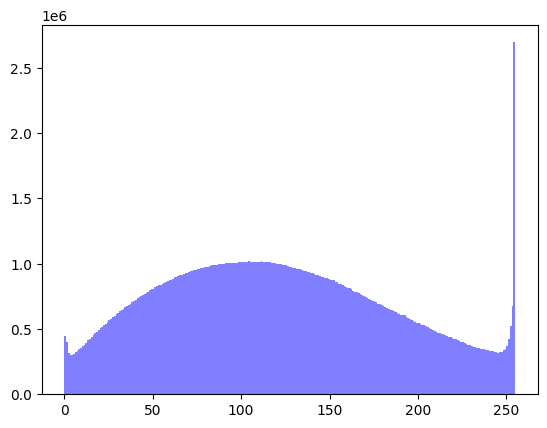

In [ ]:
plt.hist(X.flatten(), bins=255, color='blue', alpha=0.5)


**data augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)


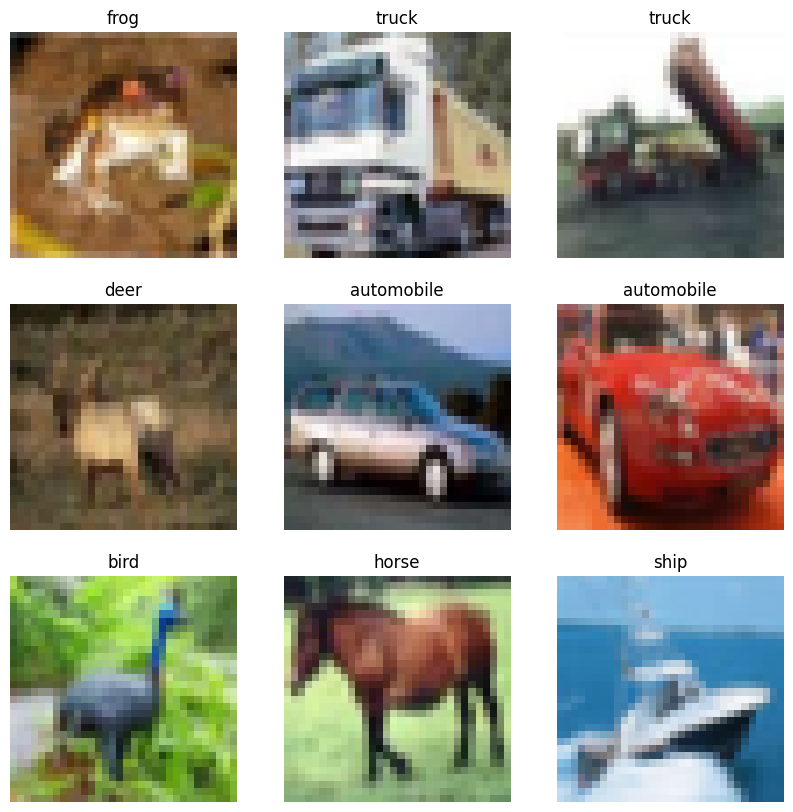

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i].astype('uint8'))
    plt.title(class_names[y[i][0]])
    plt.axis('off')
plt.show()

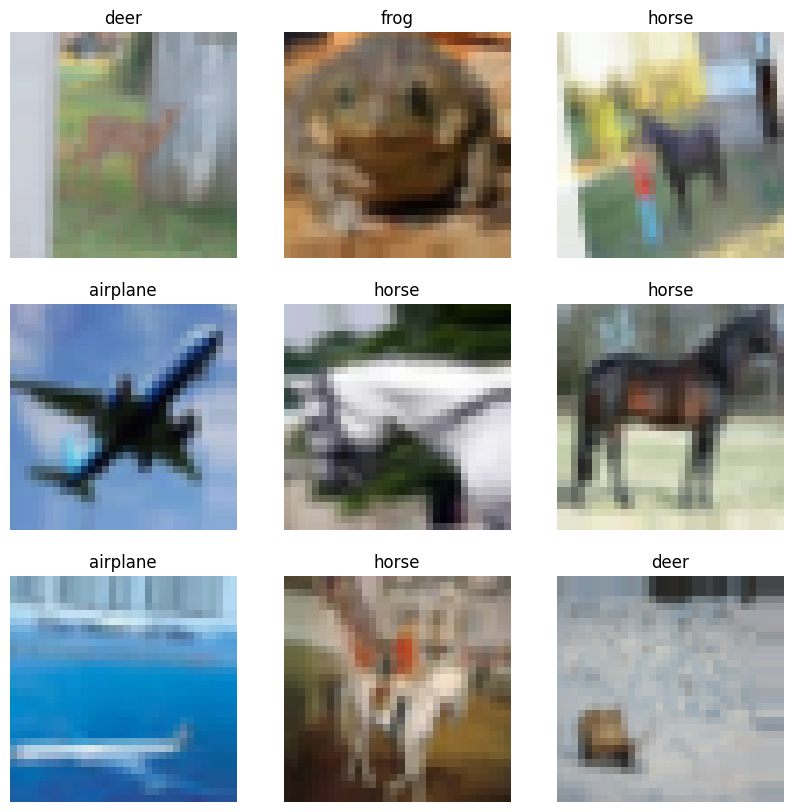

In [ ]:
X_batch, y_batch = next(datagen.flow(X, y, batch_size=9))

# Visualize the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_batch[i].astype('uint8'))
    plt.title(class_names[y_batch[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
datagen.fit(X)

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)
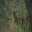

In [ ]:
 X[10]

In [ ]:
data_list = [10, 20, 30, 40]
series_list = pd.Series(data_list)
print("Series from list:")
print(series_list)

Series from list:
0    10
1    20
2    30
3    40
dtype: int64
